In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set num of classes

In [4]:
NUM_CLASSES = 31

# Read dataset

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Build model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 31)             │           341 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411 (5.51 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.0156 - loss: 3.5423
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.0194 - loss: 3.5057 - val_accuracy: 0.0265 - val_loss: 3.4680
Epoch 2/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0078 - loss: 3.4989
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0267 - loss: 3.4731 - val_accuracy: 0.0177 - val_loss: 3.4440
Epoch 3/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0469 - loss: 3.4338
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0332 - loss: 3.4302 - val_accuracy: 0.0000e+00 - val_loss: 3.4226
Epoch 4/1000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0547 - loss: 3.4240
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
8/8 ━━━━

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8374 - loss: 0.6468


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
[7.47685321e-04 4.23415512e-01 1.30106017e-01 1.03930029e-08
 1.13926984e-01 1.90831888e-02 1.03574137e-04 5.50597179e-05
 8.30693345e-04 4.10347292e-03 2.60893398e-06 2.59573710e-07
 6.15778379e-03 3.98773482e-05 2.10754916e-01 6.00468897e-10
 1.16434906e-09 5.24358591e-03 6.32454129e-03 7.14347043e-05
 1.94574692e-04 1.49679374e-06 2.40229424e-02 3.83893166e-08
 2.93953667e-10 2.04615720e-08 1.09234077e-06 9.10215419e-07
 1.14880277e-05 5.45174256e-02 2.82759400e-04]
1


# Confusion matrix

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


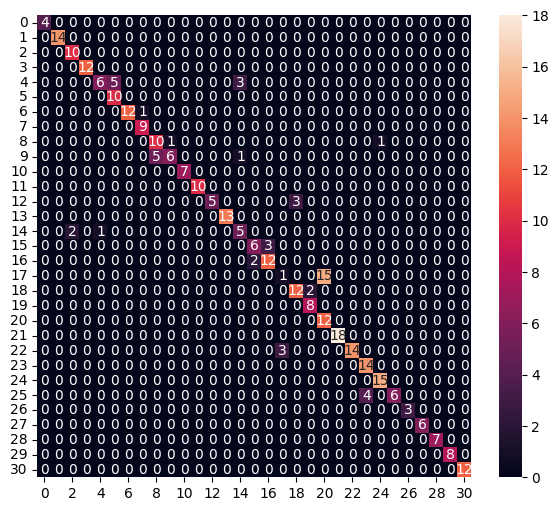

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        14
           2       0.83      1.00      0.91        10
           3       1.00      1.00      1.00        12
           4       0.86      0.43      0.57        14
           5       0.67      1.00      0.80        10
           6       1.00      0.92      0.96        13
           7       0.90      1.00      0.95         9
           8       0.67      0.83      0.74        12
           9       0.86      0.50      0.63        12
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        10
          12       1.00      0.62      0.77         8
          13       1.00      1.00      1.00        13
          14       0.56      0.62      0.59         8
          15       0.75      0.67      0.71         9
          16       0.80      0.86      0.83        14
     

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model (for Tensorflow-Lite)

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\endpl\AppData\Local\Temp\tmpc3e4zatq\assets


INFO:tensorflow:Assets written to: C:\Users\endpl\AppData\Local\Temp\tmpc3e4zatq\assets


Saved artifact at 'C:\Users\endpl\AppData\Local\Temp\tmpc3e4zatq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 31), dtype=tf.float32, name=None)
Captures:
  1671463778816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1671490806784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1671490808720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1671490891520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1671490894512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1671490880784: TensorSpec(shape=(), dtype=tf.resource, name=None)


7744

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

c:\Users\endpl\anaconda3\envs\asl_env\lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 15.6 ms
Wall time: 9.49 ms


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.47685379e-04 4.23415363e-01 1.30106106e-01 1.03929985e-08
 1.13927007e-01 1.90832019e-02 1.03574101e-04 5.50597470e-05
 8.30692647e-04 4.10347106e-03 2.60893034e-06 2.59573625e-07
 6.15778146e-03 3.98773336e-05 2.10755020e-01 6.00468730e-10
 1.16434651e-09 5.24358405e-03 6.32454176e-03 7.14347480e-05
 1.94574619e-04 1.49679317e-06 2.40229201e-02 3.83893024e-08
 2.93953584e-10 2.04615240e-08 1.09234054e-06 9.10216727e-07
 1.14880440e-05 5.45174219e-02 2.82759574e-04]
1
